# Pitchfork
Pitchfork is een populaire website waarop reviews van veelal alternatieve muzikanten worden geplaatst. Het kan gebruikt worden voor bijvoorbeeld het ontdekken van nieuwe muziek. 
Maar zijn de reviews van pitchfork wel altijd zo eerlijk? Iedereen heeft zo z'n eigen voorkeuren, en het zou zomaar kunnen dat deze de reviews insluipen. Ook zou ik willen weten of artiesten in de loop van de tijd beter worden of juist slechter. Misschien gaan ze minder moeite doen, of hebben ze juist eindelijk de middelen om hun volledige creativiteit te ontketenen.


1. Hoe is het verloop in de tijd in de score voor de meest gereviewde artiesten?
2. Worden eerste, tweede, derde, etc. albums beter beoordeeld?
<br>
<br>

### Zijn de reviews van Pitchfork eerlijk? Zijn er bepaalde factoren die een hogere score voorspellen?
<br>

3. Zijn er bepaalde reviewers die hogere scores geven?
4. Welke genres hebben de hoogste scores?
5. Welke labels hebben de hoogste scores?
6. Is het mogelijk voor deze factoren te compenseren?
7. Hoe veranderen deze zelfde eigenschappen als we compenseren voor reviewer/label/genre?

Dataset: https://www.kaggle.com/nolanbconaway/pitchfork-data

## Database importeren

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect('database.sqlite')
cur = con.cursor()

artist = []

for row in cur.execute('SELECT * FROM reviews'):
        artist.append(row)

df = pd.DataFrame(artist)

## Genres toevoegen

In [2]:
genres = []

for row in cur.execute('SELECT * FROM genres'):
        genres.append(row)

## Labels toevoegen

In [3]:
labels = []

for row in cur.execute('SELECT * FROM labels'):
        labels.append(row)

## Rename

In [4]:
df = df.rename(columns={0:'col',
                        1:'album',
                        2:'artist',
                        3:'url',
                        4:'score',
                        5:'drop_col',
                        6:'reviewer',
                        7:'drop_col',
                        8:'date',
                        9:'drop_col',
                        10:'drop_col',
                        11:'drop_col',
                        12:'year'})

df.drop(labels=['drop_col'], axis='columns', inplace=True)

## Genres toevoegen
Elk album wordt 1 genre toegewezen

In [5]:
genres_df = pd.DataFrame(genres, columns=['col','genre'])
genres_df.drop_duplicates(subset='col', inplace=True)
df = genres_df.merge(df, left_on = 'col', right_on ='col')

## Label toevoegen
Het label van elk album wordt toegevoegd

In [6]:
labels_df = pd.DataFrame(labels, columns=['col','label'])
labels_df.drop_duplicates(subset='col', inplace=True)
df = labels_df.merge(df, left_on = 'col', right_on ='col')

## Populairste artiesten
De 100 populairste artiesten

In [7]:
top_100 = df.groupby(['artist']).year.count().sort_values().tail(101).keys()[0:100]

## Aantal unieke artiesten


In [8]:
len(df.artist.unique())

8715

## Aantal unieke albums

In [9]:
len(df.album.unique())

17835

## 1. Review score van de 4 meest gereviewde artiesten
De top 5 heeft over het algemeen scores die op z'n minst voldoende zijn

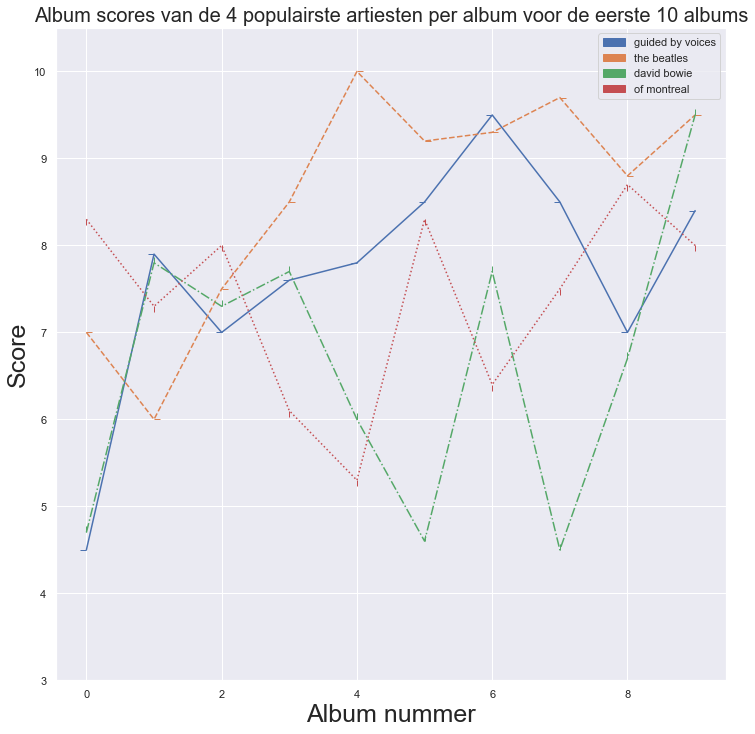

In [10]:
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import lines
from matplotlib import markers

def get_graph(number_of_artists):
    plt.figure(figsize=(12,12))
    legend_handles = []
    sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
    sns.despine()
    
    for i, n in enumerate(top_100[::-1][0:number_of_artists]):
        current = df[df['artist'] == n].sort_values(by='date')[0:10].reset_index() 
        current_line = plt.plot(current['score'], marker = (i%11), linestyle = [j for j in lines.lineStyles.keys() if j != 'None'][i%4])
        current_legend = mpatches.Patch(color=current_line[0].get_color(), label=n)
        legend_handles.append(current_legend)

    plt.ylim(3,10.5)
    plt.legend(handles=legend_handles)
    plt.title(f'Album scores van de {number_of_artists} populairste artiesten per album voor de eerste 10 albums', fontsize = 20)
    plt.ylabel('Score', fontsize=25)
    plt.xlabel('Album nummer', fontsize=25)
    
    plt.show()
    
get_graph(4)

## Percentage voldoende van top 5
De scores van deze top 5 zien er aardig goed uit, het grootste gedeelte lijkt in ieder geval een voldoende te halen. Om dit te kwantificeren reken ik hier uit hoeveel hiervan een 5.5 of hoger heeft gehaald.

In [11]:
top_5 = df[df['artist'].isin(top_100[::-1][0:5])]

percentage_voldoende = len(top_5[top_5['score'] >= 5.5]) / len(top_5)  * 100
print(f"Percentage voldoende is {round(percentage_voldoende,2)} %")

Percentage voldoende is 90.48 %


## 1. Top 100 artists met hoogste gemiddelde score
Welke 10 artiesten uit de top 100 hebben de hoogste gemiddeld score en welke de laagste?

In [12]:
df_top_100 = df[df['artist'].isin(top_100)]

df_top_100.groupby(['artist']).score.mean().sort_values(ascending=False).head(10)

artist
the beatles            8.890476
miles davis            8.730769
califone               8.318182
super furry animals    8.200000
tim hecker             8.066667
william basinski       8.054545
saint etienne          7.984615
mouse on mars          7.950000
radiohead              7.923077
swans                  7.920000
Name: score, dtype: float64

## Hoogste gemiddelde score
Van de 100 meest gereviewde artiesten hebben `The beatles` de hoogste gemiddelde score.

In [13]:
df_top_100.groupby(['artist']).score.mean().sort_values(ascending=False).tail(10)

artist
mm                 6.410000
trans am           6.320000
lil wayne          6.320000
atmosphere         6.316667
melvins            6.245455
why?               6.240000
nine inch nails    5.923077
ryan adams         5.866667
robert pollard     5.789474
coldplay           5.720000
Name: score, dtype: float64

## Artiest met laagste gemiddelde score
Van de 100 meest gereviewde artiesten heeft `Coldplay` de laagste gemiddelde score.

## 1. Is er een verschil in score per jaar?


In [14]:
for year in df.year.unique():
    year_df = df[df['year'] == year]

df.groupby(['year']).score.median().reset_index().set_index('year')

,score
year,
1999,7.2
2000,7.2
2001,7.5
2002,7.2
2003,7.3
2004,7.5
2005,7.3
2006,7.2
2007,7.1


## Er is een verschil
Er is een (klein) verschil in mediaan en gemiddelde per jaar

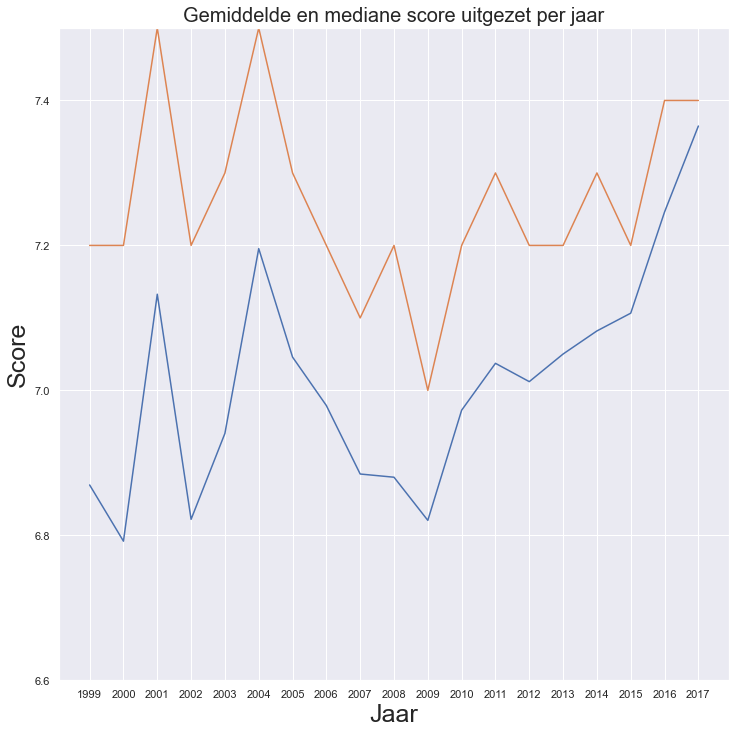

In [15]:
mean_by_year = df.groupby(['year']).score.mean()
median_by_year = df.groupby(['year']).score.median()


plt.figure(figsize=(12,12))
sns.lineplot(x = mean_by_year.index, y = mean_by_year.values)
sns.lineplot(x = median_by_year.index, y = median_by_year.values)
plt.title('Gemiddelde en mediane score uitgezet per jaar', fontsize = 20)
sns.set_theme
plt.xticks(mean_by_year.index)
plt.xlabel('Jaar', fontsize = 25)
plt.ylabel('Score', fontsize = 25)
plt.ylim(6.6,7.5)
plt.show()

## 2. Verschil in mediaan/gemiddelde in verloop van albums
Er is ook een verschil op te merken in het verloop van de albums. Het eerste album van elke artiest heeft een gemiddelde van ongeveer 7,5. Dit loopt in eerste instantie op en wordt daarna erg grillig. Dit kan worden verklaard doordat er maar weinig artiesten zijn met 10+ albums.

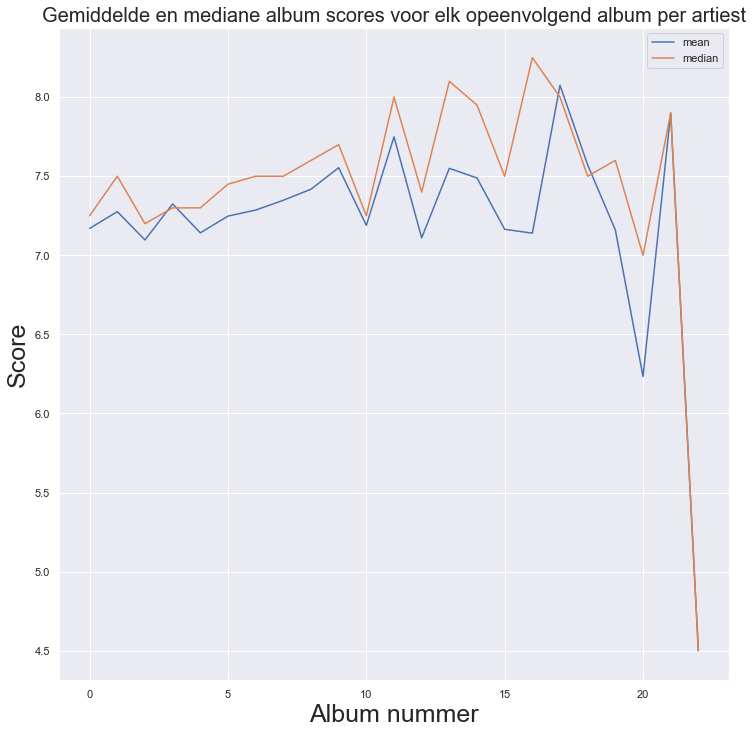

In [16]:
album_order_score = {}

for artist in top_100:
    artist_albums = df[df['artist'] == artist]
    album_order = {}
    
    for album_number, album in enumerate(artist_albums.index):
        if album_number not in album_order_score:
            album_order_score[album_number] = [artist_albums.iloc[album_number,list(artist_albums.columns).index('score')]]
        else:
            album_order_score[album_number].append(artist_albums.iloc[album_number,list(artist_albums.columns).index('score')])
            
album_order_score_df = pd.DataFrame.from_dict(album_order_score, orient='index').T

plt.figure(figsize=(12,12))
sns.lineplot(x = album_order_score_df.columns, y = album_order_score_df.mean(), label ='mean')
sns.lineplot(x = album_order_score_df.columns, y = album_order_score_df.median(), label ='median')
plt.legend()
plt.title('Gemiddelde en mediane album scores voor elk opeenvolgend album per artiest', fontsize = 20)
plt.ylabel('Score', fontsize = 25)
plt.xlabel('Album nummer', fontsize = 25)
plt.show()

## 3. Zijn er reviewers die gemiddeld een hogere score geven?
Hoeveel reviewers zijn er?

In [17]:
len(df['reviewer'].unique())

432

## De 10 productiefste reviewers
Joe Tangari is degene die de meeste reviews post.

In [18]:
df.groupby(['reviewer']).album.count().sort_values(ascending=False).head(10)

reviewer
joe tangari           816
stephen m. deusner    725
ian cohen             699
brian howe            500
mark richardson       476
stuart berman         445
marc hogan            439
nate patrin           347
marc masters          312
jayson greene         299
Name: album, dtype: int64

## top 100 reviewers
De 100 reviewers met de meeste reviews worden uitgekozen om mee verder te werken. Hiervan worden mediaan van de score, gemiddelde score en aantal reviews in een dictionary opgeslagen, hiervan wordt een dataframe gemaakt en gesorteerd op hoogste gemiddelde.

In [19]:
top_100_reviewers = df.groupby(['reviewer']).album.count().sort_values(ascending=False).head(100)

reviewers_dict = {}

for n in top_100_reviewers.index:
    df_reviewer = df[df['reviewer'] == n]
    reviewers_dict[n] = {'mean' : df_reviewer.score.mean(),
                         'median' : df_reviewer.score.median(),
                         'review_quantity' : len(df_reviewer)}
reviewers_df = pd.DataFrame(reviewers_dict).T
reviewers_df.sort_values(by='mean', ascending=False)

,mean,median,review_quantity
jenn pelly,8.056098,8.0,41.0
seth colter walls,7.724138,7.9,58.0
scott plagenhoef,7.669106,7.8,123.0
alex linhardt,7.616667,7.7,42.0
mark richardson,7.578571,7.8,476.0
...,...,...,...
liz colville,6.343396,6.6,53.0
joshua love,6.342056,6.4,107.0
brent dicrescenzo,6.163441,6.9,93.0
adam moerder,6.151675,6.5,209.0


## 3. Gemiddelde per reviewer

Van het gemiddelde van deze 10 reviewers wordt hier een barchart gemaakt om het verschil weer te geven. Dit zijn de 10 reviewers uit de top 100 productiefste reviewers die enerszijds het positiefst zijn (de 5 hoogst gevende reviewers) en anderzijds het negatiefst zijn (de 5 negatiefste reviewers). Zoals hierin te zien is er een aanzienlijk verschil.

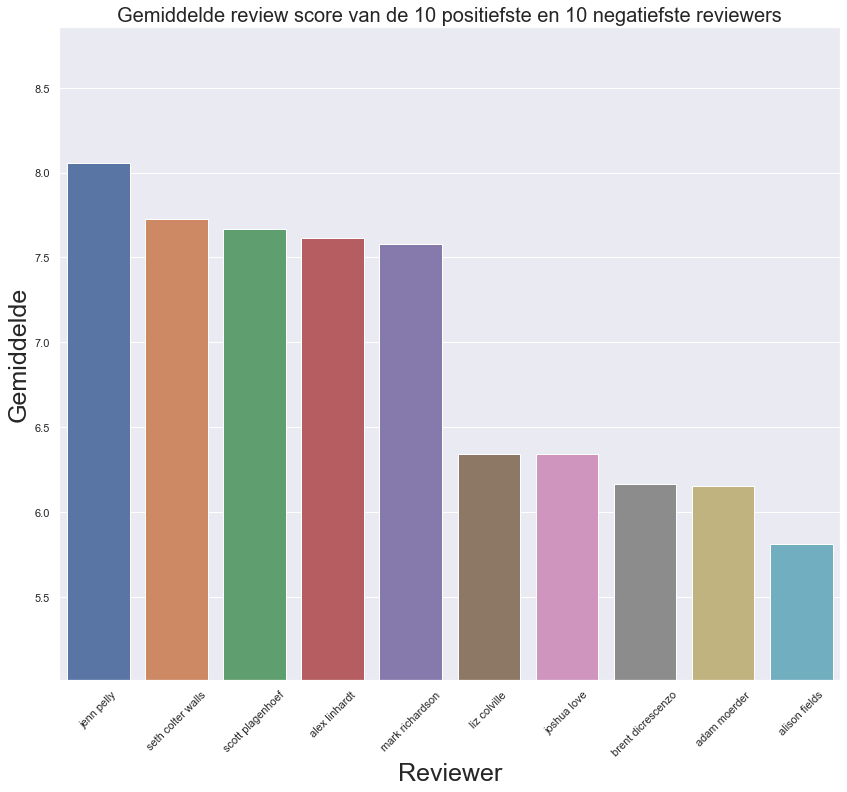

In [20]:
reviewers_subset = pd.concat([reviewers_df.sort_values(by='mean', ascending=False)[0:5], \
                              reviewers_df.sort_values(by='mean', ascending=True)[0:5]]).sort_values(by='mean', ascending=False)

plt.figure(figsize=(14,12))

sns.barplot(x = reviewers_subset.index, y = reviewers_subset['mean'])
plt.xticks(rotation=45)
plt.ylim(reviewers_df['mean'].min()-0.8,reviewers_df['mean'].max()+0.8)
plt.ylabel('Gemiddelde', fontsize=25)
plt.xlabel('Reviewer', fontsize = 25)
plt.title('Gemiddelde review score van de 10 positiefste en 10 negatiefste reviewers', fontsize = 20)
plt.show()

## Totale gemiddelde
Het gemiddelde van alle reviews is

In [21]:
df_score_mean = df.score.mean()
df_score_mean

7.005779372587397

## Verschil in gemiddelde score
Er is hier een duidelijk verschil te zien in gemiddelde score. Degene met de laagste scores is Alison Fields.

In [22]:
reviewers_df[reviewers_df['mean'] == reviewers_df['mean'].min()]

,mean,median,review_quantity
alison fields,5.81087,6.0,46.0


## Hoogste score
Degene met de hoogste score is Jenn Pelly.

In [23]:
reviewers_df[reviewers_df['mean'] == reviewers_df['mean'].max()]

,mean,median,review_quantity
jenn pelly,8.056098,8.0,41.0


## Verschil hoogste en laagste
Dit verschil tussen de hoogste en laagste gemiddelde score is ruim 2 punten, terwijl ze allebei een redelijke hoeveelheid reviewers hebben uitgevoerd! Dit suggereert dat de specifieke reviewer een belangrijke factor is bij het bepalen of een score betrouwbaar is.

In [24]:
reviewers_df[reviewers_df['mean'] == reviewers_df['mean'].max()]['mean'].values[0] - reviewers_df[reviewers_df['mean'] == reviewers_df['mean'].min()]['mean'].values[0]

2.245227995758219

## Oneerlijke scores
De reviewers van Pitchfork zijn dus ook maar mensen met elk hun eigen vooroordelen, misschien is het voor Pitchfork een mogelijkheid om op hun ingezonden score een algoritme toe te passen wat hun eigen bias in acht neemt.

## 4. Genre verdeling
Er is ook per genre een verschil te zien. `Pop/R&B` scoort het laagste, terwijl `Experimental` het beste uit de bus komt. Het verschil tussen deze twee is ongeveer 0.6 punt.

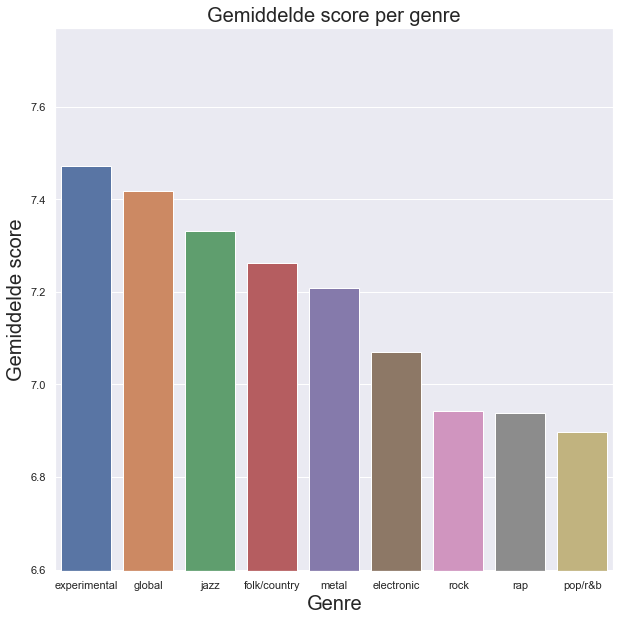

In [25]:
mean_by_genre = df.groupby(['genre']).score.mean().sort_values(ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(x = mean_by_genre.index, y = mean_by_genre.values)
plt.ylim(mean_by_genre.values.min()-0.3,mean_by_genre.values.max()+0.3)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Gemiddelde score', fontsize = 20)
plt.title('Gemiddelde score per genre', fontsize = 20)
plt.show()

## Gemiddelde per genre

In [26]:
mean_by_genre

genre
experimental    7.470796
global          7.417391
jazz            7.331378
folk/country    7.262892
metal           7.208683
electronic      7.068907
rock            6.941829
rap             6.937970
pop/r&b         6.896228
Name: score, dtype: float64

## 5. Label verdeling
De 100 productiefste labels worden opgezocht

In [27]:
top_100_labels = df.groupby(['label']).album.count().sort_values(ascending=False)[1:101]
top_100_labels

label
drag city        269
sub pop          266
thrill jockey    244
merge            239
warp             209
                ... 
polydor           36
parlophone        36
planet mu         36
rhymesayers       36
alien8            36
Name: album, Length: 100, dtype: int64

## Weergave verschillen
De hoogste en laagste scores in de top 10 verschillen bijna een volle punt

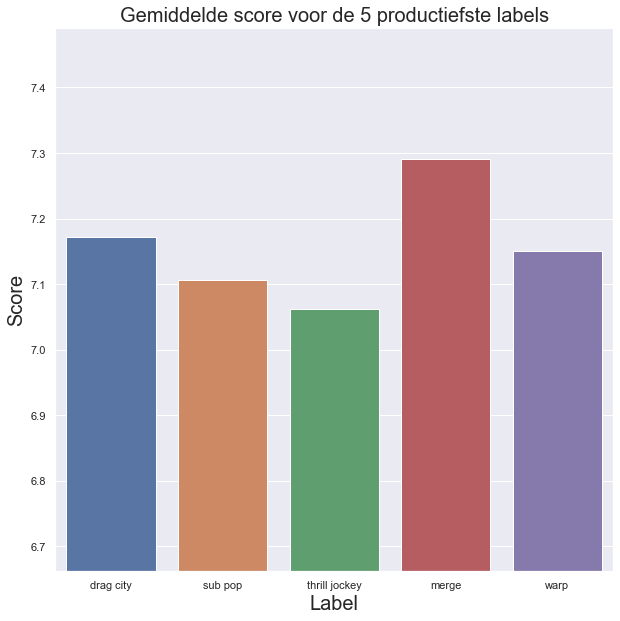

In [28]:
label_scores = {}

for n in top_100_labels.index[0:5]:
    label_scores[n] = (df[df['label']==n].score.mean())

label_scores_df = pd.DataFrame(label_scores, index=['score']).T

plt.figure(figsize=(10,10))
sns.barplot(x = label_scores_df.index, y = label_scores_df['score'])
plt.ylim(label_scores_df['score'].min()-0.4, label_scores_df['score'].max()+0.2)
plt.xlabel('Label', fontsize=20)
plt.ylabel('Score', fontsize = 20)
plt.title('Gemiddelde score voor de 5 productiefste labels', fontsize=20)
plt.show()

## Violin plot
Met behulp van een violin en strip plot wordt de distributie verder in kaar gebracht

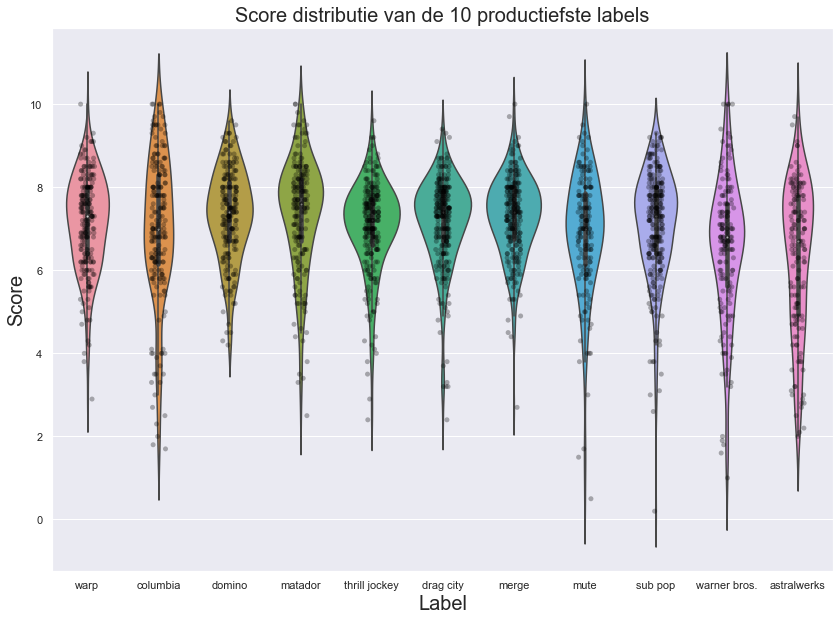

In [29]:
labels_df = pd.DataFrame(df[df['label'].isin(list(top_100_labels.index[0:11]))])

plt.figure(figsize=(14,10))
sns.violinplot(x=labels_df['label'], y = df['score'])
sns.stripplot(data=labels_df, x= 'label', y = 'score', color = 'black', alpha = 0.3)
plt.title('Score distributie van de 10 productiefste labels', fontsize = 20)
plt.xlabel('Label', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
plt.show()

labels_df = pd.DataFrame(df[df['label'].isin(list(top_100_labels.index[0:5]))])


## 6. Corrigeren
Om te corrigeren voor de voorkeuren van de reviewers, worden de afwijkingen van elke reviewer, elk genre en elk label uitgerekend, en wordt er voor elk album een `adjusted_score` uitgerekend, welke rekening houdt met individuele voor- en nadelen van elk album.

In [30]:
def create_dataframe(column, data):
    _dict = {}
    data[column] = data[column].fillna('unknown')
    for n in data[column].unique():
        _df = data[data[column] == n]
        _dict[n] = {'mean' : _df.score.mean(),
                         'median' : _df.score.median(),
                         'review_quantity' : int(len(_df))}
    output_df = pd.DataFrame(_dict).T
    return output_df


reviewers_df_all = create_dataframe('reviewer', df)


genre_df_all  = create_dataframe('genre', df)


label_df_all = create_dataframe('label', df)

def score_adjustment(reviewer, genre, label):
    reviewer_adjustment = df_score_mean - reviewers_df_all.loc[reviewer,'mean']
    genre_adjustment = df_score_mean - genre_df_all.loc[genre, 'mean']
    label_adjustment = df_score_mean - label_df_all.loc[label, 'mean']
    return reviewer_adjustment + genre_adjustment + label_adjustment

df['adjustment'] = df.apply(lambda x: score_adjustment(x['reviewer'], x['genre'], x['label']), axis=1)
df['adjusted_score'] = df['score'] + df['adjustment']

## 7. Gemiddelde is gelijk gebleven
Doordat er voor elk album dezelfde correctie wordt uitgevoerd, blijft het gemiddelde gelijk (zolang we afronden op maximaal 14 cijfers)

In [31]:
round(df.adjusted_score.mean(),14) == round(df.score.mean(), 14)

True

In [32]:
df.adjusted_score.mean()

7.005779372587395

## Andere top 10
Door deze correctie ziet de top 10 er behoorlijk anders uit

In [33]:
top_10_mean = df[df['artist'].isin(top_100[::-1][0:10])]
top_10_mean.groupby(['artist']).adjusted_score.mean().sort_values(ascending=False)

artist
the beatles          8.025200
david bowie          7.941242
guided by voices     7.585274
of montreal          7.536061
neil young           7.388556
xiu xiu              7.295141
mogwai               7.085659
animal collective    7.070278
the fall             7.027646
robert pollard       6.694148
Name: adjusted_score, dtype: float64

## Ter referentie de oorspronkelijke

In [34]:
df_top_100.groupby(['artist']).score.mean().sort_values(ascending=False).head(10)

artist
the beatles            8.890476
miles davis            8.730769
califone               8.318182
super furry animals    8.200000
tim hecker             8.066667
william basinski       8.054545
saint etienne          7.984615
mouse on mars          7.950000
radiohead              7.923077
swans                  7.920000
Name: score, dtype: float64

## Winnaars
De 10 artiesten die in totaal het meeste baat hebben gehad bij deze correctie, en dus eigenlijk in eerste instantie het hardst zijn beoordeeld, zijn deze:

In [35]:
df.groupby(['artist']).adjustment.sum().sort_values(ascending=False).head(10)

artist
robert pollard                 17.188820
black rebel motorcycle club    14.245047
of montreal                    14.021214
ghostland observatory          12.216201
the get up kids                12.139866
ryan adams                     11.829973
eels                           11.729377
ben folds five                 11.418646
nine inch nails                10.929119
hot hot heat                   10.346039
Name: adjustment, dtype: float64

## Verliezers
Terwijl deze 10 artiesten juist het mildst zijn beoordeeld

In [36]:
df.groupby(['artist']).adjustment.sum().sort_values(ascending=False)[-11:-1,]

artist
bonnie prince billy   -11.912137
jhann jhannsson       -12.072559
john zorn             -12.289497
james brown           -12.350992
william basinski      -12.868307
fennesz               -14.119206
miles davis           -14.178350
arthur russell        -14.533988
tim hecker            -14.555098
the beatles           -18.170799
Name: adjustment, dtype: float64

## Distributie is genormaliseerd
Zoals te zien in de onderstaande grafieken heeft de correctie tot gevolg gehad dat de distributie van de getallen dichter rond het gemiddelde is komen te liggen. Het heeft nogal wat weg van een normale verdeling.

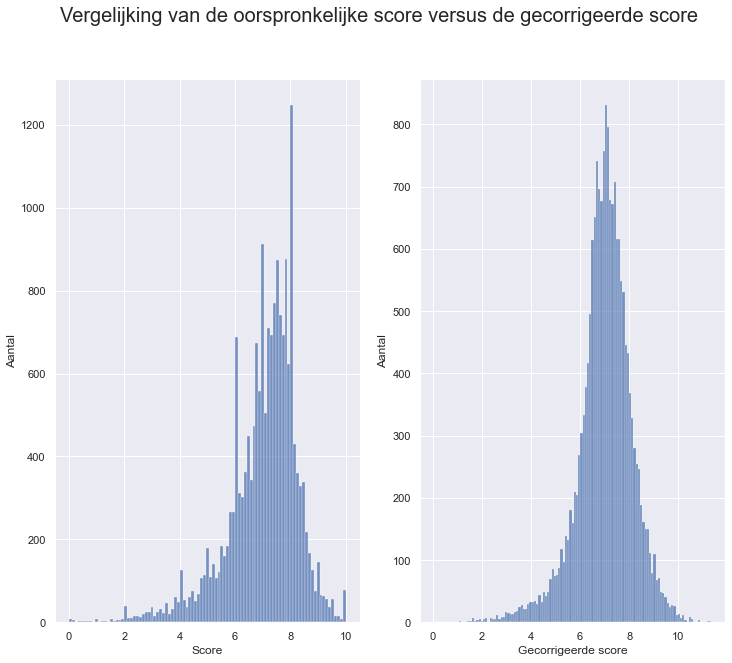

In [37]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(12)
fig.suptitle('Vergelijking van de oorspronkelijke score versus de gecorrigeerde score', fontsize = 20)

sns.histplot(ax=axes[0], data = df, x="score").set(xlabel='Score', ylabel = "Aantal")
sns.histplot(ax=axes[1], data = df, x="adjusted_score" ).set(xlabel='Gecorrigeerde score', ylabel = "Aantal")

plt.show()

## Beschrijving voor correctie

In [38]:
df['score'].describe()

count    18393.000000
mean         7.005779
std          1.293675
min          0.000000
25%          6.400000
50%          7.200000
75%          7.800000
max         10.000000
Name: score, dtype: float64

## Dichter bij gemiddelde
Terwijl het gemiddelde gelijk is gebleven, geldt dit niet voor de andere waarden. Standaarddeviatie is kleiner geworden, min, Q1 en Q3 bevinden zich dichter bij het gemiddelde. Alleen de maximale score bevindt zich verder van het gemiddelde, en is zelfs boven de 10.

In [39]:
df['adjusted_score'].describe()

count    18393.000000
mean         7.005779
std          1.121151
min          0.059858
25%          6.480339
50%          7.057731
75%          7.671409
max         11.324587
Name: adjusted_score, dtype: float64

## Beste 10 uit top 100
Best preseterende top 100 artiesten na correctie

In [40]:
df_top_100 = df[df['artist'].isin(top_100)]

df_top_100.groupby(['artist']).adjusted_score.mean().sort_values(ascending=False).head(10)

artist
super furry animals    8.392131
r.e.m.                 8.136209
radiohead              8.076700
the beatles            8.025200
modest mouse           8.012646
drive-by truckers      7.991441
songs: ohia            7.960042
david bowie            7.941242
beck                   7.896290
curren$y               7.876077
Name: adjusted_score, dtype: float64

## Slechtste 10 uit top 100
Slechtst presterende top 100 artiesten na correctie

In [41]:
df_top_100.groupby(['artist']).adjusted_score.mean().sort_values(ascending=False).tail(10)

artist
why?               6.667730
mark kozelek       6.611505
prince             6.585333
arthur russell     6.515092
jhann jhannsson    6.472744
bibio              6.440095
mm                 6.298075
trans am           6.289642
squarepusher       6.250092
coldplay           6.046887
Name: adjusted_score, dtype: float64

### 